In [1]:
import sys
sys.path.append("..")
import ScheduleFlow
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# create workload for large jobs
def create_jobs(num_procs, num_jobs, execution, submission):
    job_list = []

    for i in range(num_jobs):
        execution_time = np.random.randint(int(execution/2), execution*2)
        request_time = execution_time + np.random.randint(-10, 10)
        processing_units = np.random.randint(1, num_procs + 1)
        submission_time = submission
        job_list.append(ScheduleFlow.Application(
            processing_units,
            submission_time,
            execution_time,
            [request_time]))
    return job_list

job_list = create_jobs(10, 3, 100, 0)
job_list += create_jobs(10, 2, 10, 2)
job_list

[Job(Nodes: 1, Submission: 0.0, Walltime: 76.0, Request: 80.0),
 Job(Nodes: 9, Submission: 0.0, Walltime: 106.0, Request: 101.0),
 Job(Nodes: 5, Submission: 0.0, Walltime: 69.0, Request: 60.0),
 Job(Nodes: 1, Submission: 2.0, Walltime: 6.0, Request: 14.0),
 Job(Nodes: 3, Submission: 2.0, Walltime: 17.0, Request: 26.0)]

In [3]:
# only large jobs
procs = 10
job_list = create_jobs(procs, 100, 100, 0)
print(len(job_list))

100


In [32]:
# run the batch scheduler simulations with different values for the batch size
df = pd.DataFrame(columns=["Batch Size", "Utilization", "Response_time", "Scheduler"])
i = 0
simulator = ScheduleFlow.Simulator(check_correctness=True)
for batch_size in range(0,101,10):
    batch_size = max(1,batch_size)
    sch = ScheduleFlow.BatchScheduler(ScheduleFlow.System(procs),
                                      batch_size=batch_size)
    results = simulator.run_scenario(
        sch,
        job_list,
        metrics=["system utilization", "job response time"])
    df.loc[i] = [batch_size, results['system utilization'],
                 results['job response time']/3600, "Batch"]
    i += 1
                 
df

,Batch Size,Utilization,Response_time,Scheduler
0,1,0.658231,1.542844,Batch
1,10,0.851481,1.369300,Batch
2,20,0.909941,1.269458,Batch
3,30,0.956690,1.185458,Batch
4,40,0.985394,1.083292,Batch
5,50,0.986044,1.023392,Batch
6,60,0.985394,1.023836,Batch
7,70,0.983772,1.023622,Batch
8,80,0.985394,1.023614,Batch
9,90,0.985394,1.023614,Batch


In [33]:
# run the online scheduler simulation
sch = ScheduleFlow.OnlineScheduler(ScheduleFlow.System(procs))
online = simulator.run_scenario(sch, job_list,
                                 metrics=["system utilization", "job response time"])
print(online)
i = len(df)
for batch_size in range(0,101,10):
    df.loc[i] = [batch_size, online['system utilization'],
                 online['job response time']/3600, "Online"]
    i += 1

df.tail()

{'job response time': 3180.55, 'system utilization': 0.959454253611557}


,Batch Size,Utilization,Response_time,Scheduler
17,60,0.959454,0.883486,Online
18,70,0.959454,0.883486,Online
19,80,0.959454,0.883486,Online
20,90,0.959454,0.883486,Online
21,100,0.959454,0.883486,Online


Text(0, 0.5, 'Utilization')

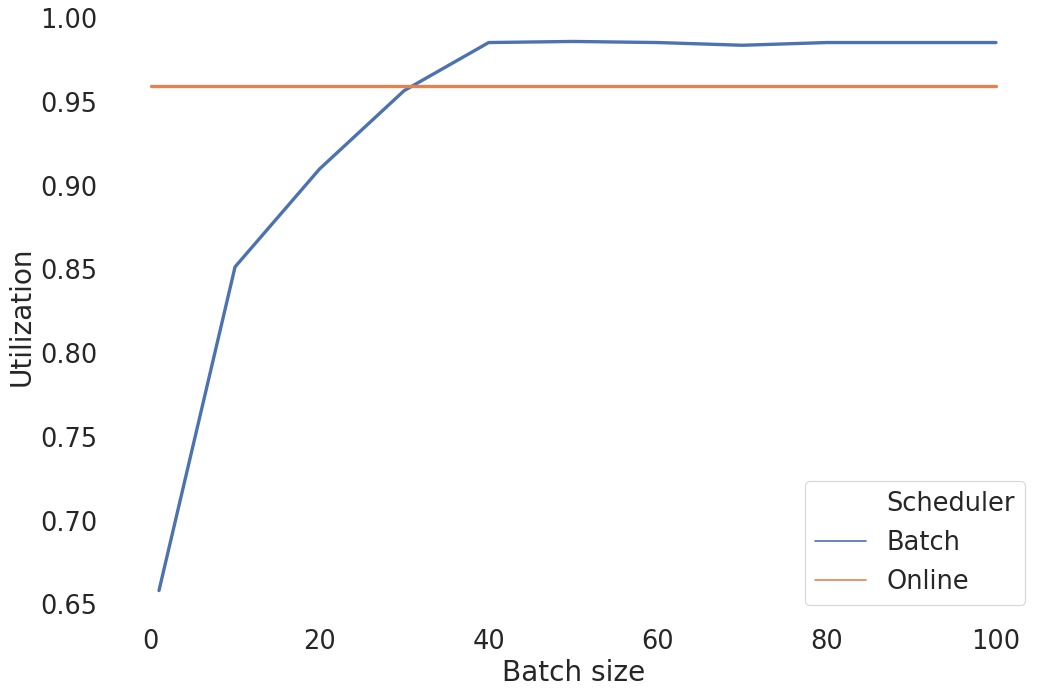

In [34]:
#plot utilization

fig = plt.figure(figsize=(15,10), dpi=80)  
sns.set(rc={'axes.facecolor':'#ffffff'}, font_scale=2.1)

ax = sns.lineplot(y="Utilization", x="Batch Size", markers=True,
                  dashes=False, linewidth=3, hue="Scheduler",
                  data=df)
plt.xlabel("Batch size")
plt.ylabel("Utilization")

Text(0, 0.5, 'Average job response time (hours)')

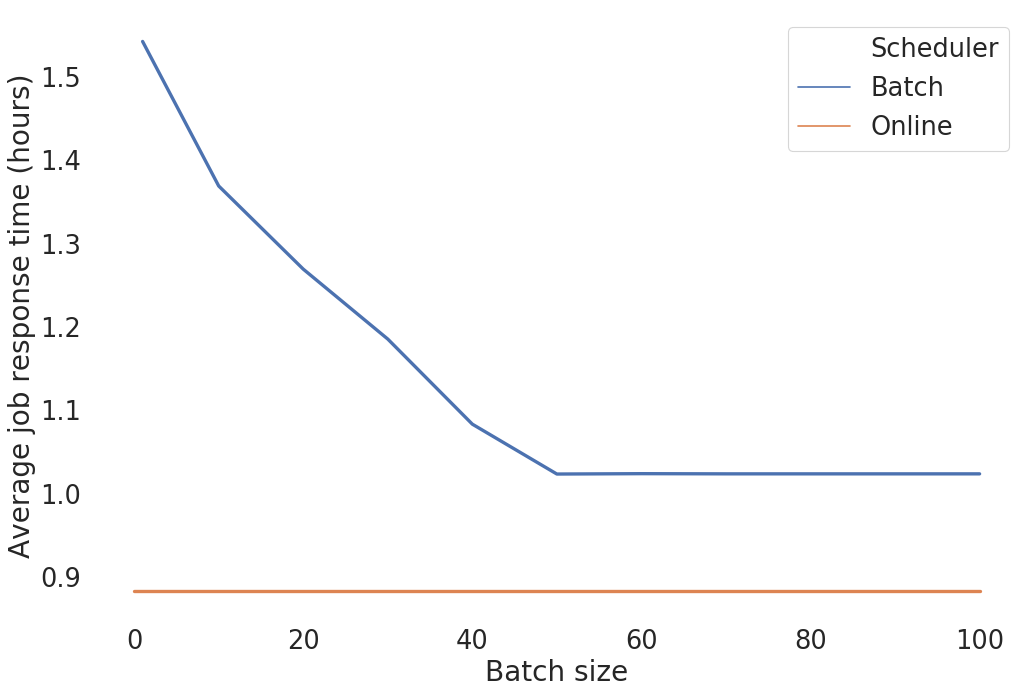

In [36]:
#plot response time

fig = plt.figure(figsize=(15,10), dpi=80)  
sns.set(rc={'axes.facecolor':'#ffffff'}, font_scale=2.1)

ax = sns.lineplot(y="Response_time", x="Batch Size", markers=True,
                  dashes=False, linewidth=3, hue="Scheduler",
                  data=df)
plt.xlabel("Batch size")
plt.ylabel("Average job response time (hours)")